## Install Qiskit

In [0]:
!pip install qiskit

    100% |████████████████████████████████| 6.6MB 966kB/s 
    100% |████████████████████████████████| 18.5MB 1.8MB/s 
    100% |████████████████████████████████| 71kB 35.2MB/s 
    100% |████████████████████████████████| 61kB 33.1MB/s 
    100% |████████████████████████████████| 51kB 27.3MB/s 
    100% |████████████████████████████████| 51kB 24.4MB/s 
    100% |████████████████████████████████| 5.3MB 4.4MB/s 
    100% |████████████████████████████████| 2.3MB 12.6MB/s 
    100% |████████████████████████████████| 102kB 32.2MB/s 
  Failed building wheel for qiskit
  Running setup.py clean for qiskit
Failed to build qiskit
google-colab 1.0.0 has requirement requests~=2.18.0, but you'll have requests 2.21.0 which is incompatible.
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: requests 2.18.4
    Uninstalling requests-2.18.4:
      Successfully uninstalled requests-2.18.4
  Found existing installation: sym

##Login to IBM Q Experience

In [0]:
from qiskit import IBMQ
IBMQ.save_account('d330b44b077d9ae56714c4ba96676236d87a63bf10cddb7e736e81658af8fab730e5a3aa92778da79f1fb93d29492a6f7f7fd9e074edb520e8b79b64dad61c0e')

/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/credentials/_configrc.py:129: UserWarning: Credentials already present. Set overwrite=True to overwrite.
  warnings.warn('Credentials already present. Set overwrite=True to overwrite.')


In [0]:
from qiskit import  QuantumRegister, ClassicalRegister, QuantumCircuit

In [0]:
# Create a Quantum Register with 1 qubits and Classsical Register with 1 bit
q = QuantumRegister(1)
c = ClassicalRegister(1)

In [0]:
# Create a Quantum Circuit acting on the q and c registers
circ = QuantumCircuit(q,c)

In [0]:
# Add a X gate on qubit 0 to flip the bit
circ.x(q[0])


In [0]:
circ.draw()

## Exercisse: Add a Hadamard Gate

In [0]:
# Exercise: Add a hadamard gate 

circ.h(q[0])
circ.draw()

## Measurement

In [0]:
# add measurement operation
circ.measure(q,c)

In [0]:
#drawing the circuit
circ.draw()

## Simulation

In [0]:
# Import Aer
from qiskit import BasicAer
from qiskit import execute                         

In [0]:
backend = BasicAer.get_backend('qasm_simulator')
job_sim = execute(circ, backend, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [0]:
counts = result_sim.get_counts(circ)
print(counts)


{'0': 523, '1': 501}


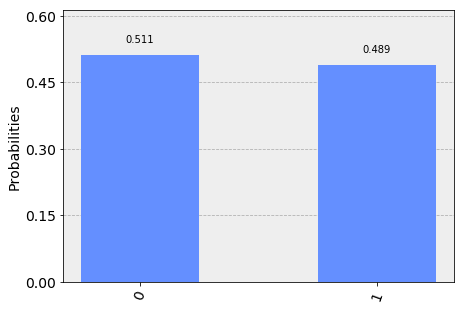

In [0]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

## Ex: Create a Superposition of 3 Qubits

In [0]:
# Exercise
q = QuantumRegister(3)
c = ClassicalRegister(3)

circ = QuantumCircuit(q,c)

circ.h(q[0])
circ.h(q[1])
circ.h(q[2])

circ.draw()

In [0]:
circ.measure(q,c)
circ.draw()

In [0]:
backend = BasicAer.get_backend('qasm_simulator')
job_sim = execute(circ, backend, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [0]:
counts = result_sim.get_counts(circ)
print(counts)

{'101': 132, '100': 116, '010': 113, '011': 134, '111': 121, '000': 139, '110': 148, '001': 121}


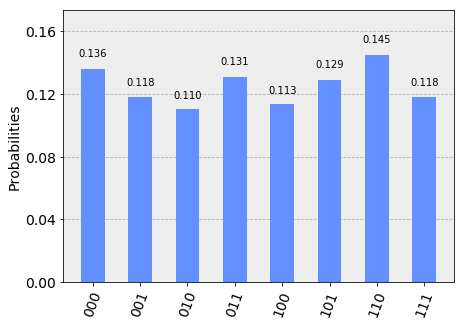

In [0]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

## Create a Pair of Entangled Qubits

In [0]:
# Create a Quantum Register with 2 qubits.
q = QuantumRegister(2)
c = ClassicalRegister(2)

# Create a Quantum Circuit acting on the q register
circ = QuantumCircuit(q,c)

In [0]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(q[0])

# Add a X gate on qubit 1.
circ.x(q[1])

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(q[0], q[1])

#drawing the circuit
circ.draw()

In [0]:
circ.measure(q,c)
circ.draw()

In [0]:
backend = BasicAer.get_backend('qasm_simulator')
job_sim = execute(circ, backend, shots=1024)

result_sim = job_sim.result()

In [0]:
counts = result_sim.get_counts(circ)
print(counts)

{'10': 513, '01': 511}


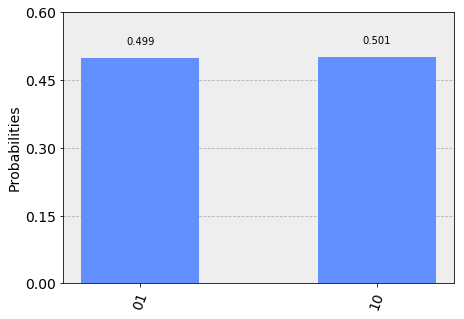

In [0]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

## Ex: Create a Entangled 3 Qubits

In [0]:
q = QuantumRegister(3)
c = ClassicalRegister(3)
circ = QuantumCircuit(q,c)

In [0]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(q[0])
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(q[0], q[1])
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(q[0], q[2])
circ.draw()

In [0]:
circ.measure(q,c)
circ.draw()

In [0]:
backend = BasicAer.get_backend('qasm_simulator')
job_sim = execute(circ, backend, shots=1024)

result_sim = job_sim.result()

In [0]:
counts = result_sim.get_counts(circ)
print(counts)

{'000': 511, '111': 513}


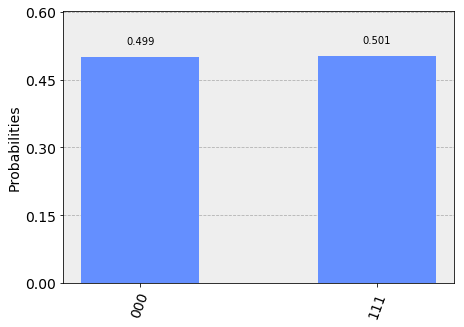

In [0]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [0]:
#Exercise

q = QuantumRegister(6)
circuit = QuantumCircuit(q)
circuit.h(q[0])
circuit.ccx(q[0], q[1], q[2])
circuit.cx(q[1], q[3])
circuit.x(q)
circuit.h(q[2])
circuit.h(q[3])
circuit.draw()

## Check IBM Device Availability

In [0]:
IBMQ.load_accounts()
IBMQ.backends()

[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

In [0]:
from qiskit.providers.ibmq import least_busy

large_enough_devices = IBMQ.backends(filters=lambda x: x.configuration().n_qubits > 3 and not x.configuration().simulator)
backend = least_busy(large_enough_devices)
print("The best backend is " + backend.name())

The best backend is ibmqx4


In [0]:
from qiskit.tools.monitor import job_monitor
shots = 1024           # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 3        # Maximum number of credits to spend on executions.

job_exp = execute(circ, backend=backend, shots=shots, max_credits=max_credits)
job_monitor(job_exp)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

In [0]:
result_exp = job_exp.result()
counts = result_exp.get_counts(circ)
print(counts)

In [0]:

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)